Dataset Head:
          Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  

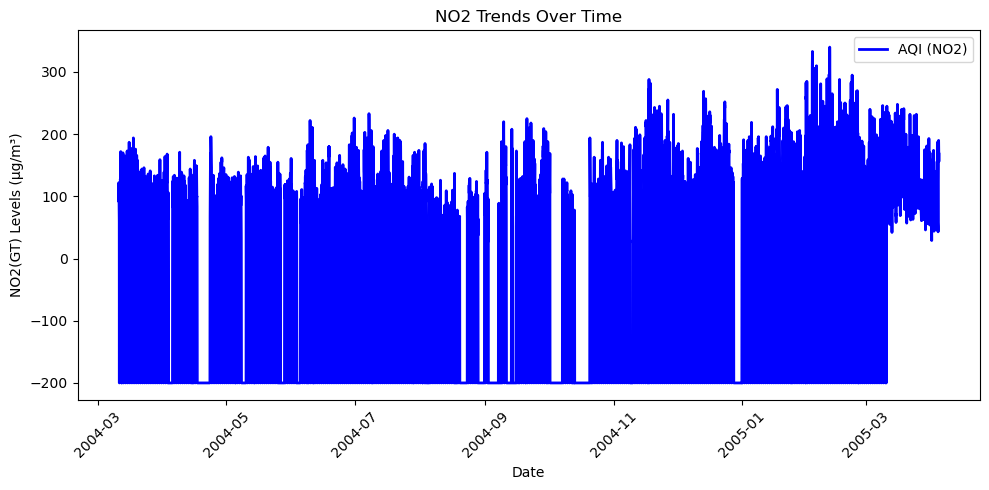

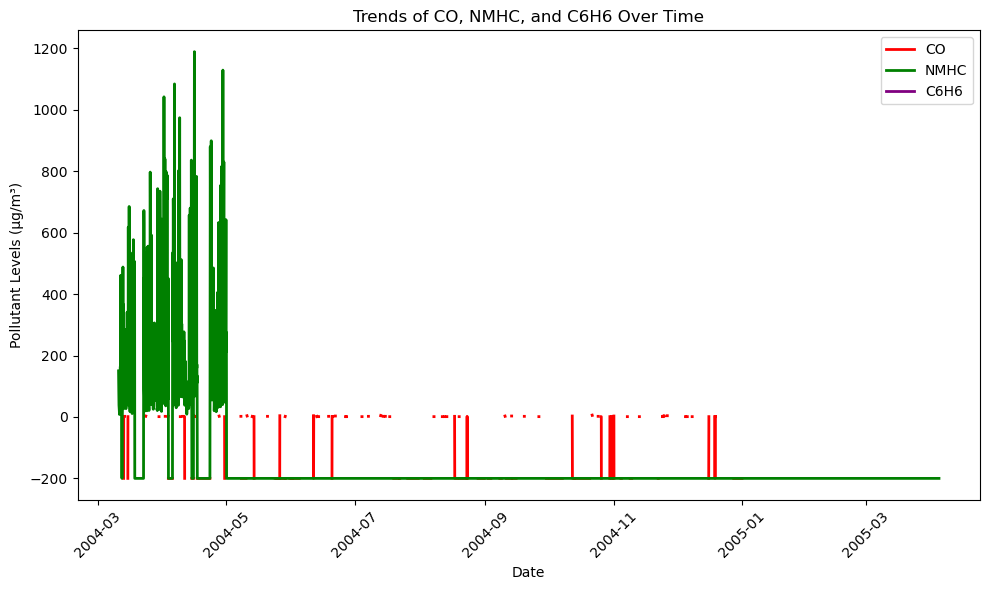

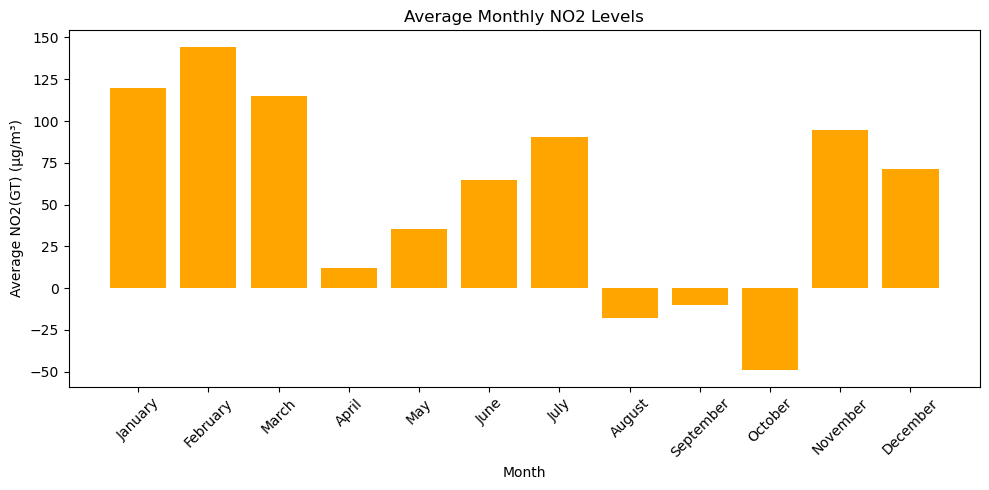

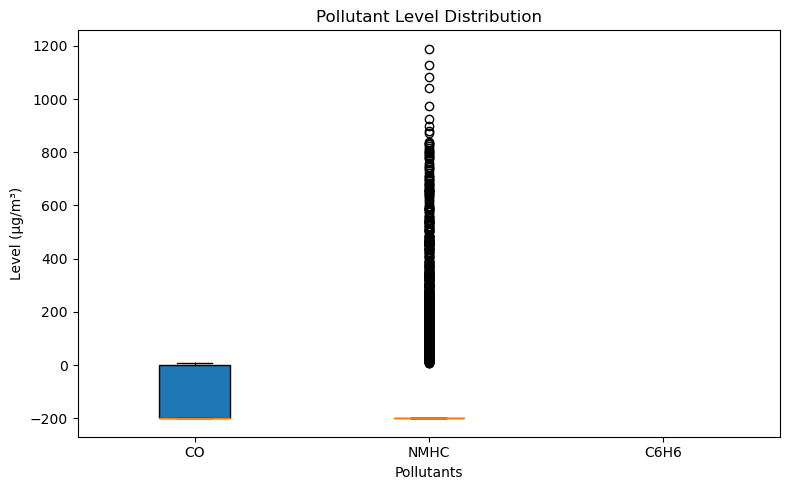

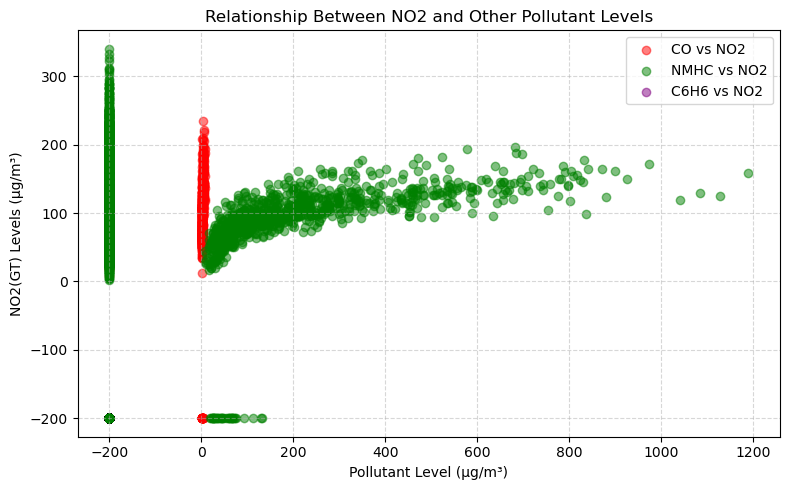

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data = pd.read_csv("City_Air_Quality.csv", sep=';')

# Step 2: Explore the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())

# Step 3: Identify relevant variables and clean column names
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces from column names

# Correct the time format
data['Time'] = data['Time'].str.replace('.', ':', regex=False)  # Ensure replacement is done correctly

# Combine Date and Time into a single datetime column
data['Date'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Check for NaT values and print rows with missing dates
missing_dates = data[data['Date'].isna()]
if not missing_dates.empty:
    print("\nRows with missing Date values:\n", missing_dates)

# Drop rows with NaT values in 'Date'
data.dropna(subset=['Date'], inplace=True)

# Step 4: Convert pollutant columns to numeric, forcing errors to NaN
pollutants = ['NO2(GT)', 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)']
for pollutant in pollutants:
    data[pollutant] = pd.to_numeric(data[pollutant], errors='coerce')

# Check for any NaN values in pollutant columns after conversion
print("\nNaN values in pollutant columns after conversion:\n", data[pollutants].isna().sum())

# Step 5: Line plot for overall AQI trend over time
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['NO2(GT)'], color='blue', label='AQI (NO2)', linewidth=2)
plt.xlabel("Date")
plt.ylabel("NO2(GT) Levels (µg/m³)")
plt.title("NO2 Trends Over Time")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.tight_layout()  # Adjust layout
plt.show()

# Step 6: Line plots for individual pollutants
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['CO(GT)'], color='red', label='CO', linewidth=2)
plt.plot(data['Date'], data['NMHC(GT)'], color='green', label='NMHC', linewidth=2)
plt.plot(data['Date'], data['C6H6(GT)'], color='purple', label='C6H6', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Pollutant Levels (µg/m³)")
plt.title("Trends of CO, NMHC, and C6H6 Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Bar plot for average AQI values by month
data['Month'] = data['Date'].dt.month_name()  # Get month names for better labeling
monthly_aqi = data.groupby('Month')['NO2(GT)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 'October', 
    'November', 'December'
])  # Ensure months are in order

plt.figure(figsize=(10, 5))
plt.bar(monthly_aqi.index, monthly_aqi.values, color='orange')
plt.xlabel("Month")
plt.ylabel("Average NO2(GT) (µg/m³)")
plt.title("Average Monthly NO2 Levels")
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()
plt.show()

# Step 8: Box plot for pollutant level distribution
plt.figure(figsize=(8, 5))
plt.boxplot([data['CO(GT)'].dropna(), data['NMHC(GT)'].dropna(), data['C6H6(GT)'].dropna()], 
            labels=['CO', 'NMHC', 'C6H6'], 
            patch_artist=True)  # Add color to box plots
plt.xlabel("Pollutants")
plt.ylabel("Level (µg/m³)")
plt.title("Pollutant Level Distribution")
plt.tight_layout()
plt.show()

# Step 9: Scatter plot for NO2 vs. Pollutant Levels
plt.figure(figsize=(8, 5))
plt.scatter(data['CO(GT)'], data['NO2(GT)'], color='red', label='CO vs NO2', alpha=0.5)
plt.scatter(data['NMHC(GT)'], data['NO2(GT)'], color='green', label='NMHC vs NO2', alpha=0.5)
plt.scatter(data['C6H6(GT)'], data['NO2(GT)'], color='purple', label='C6H6 vs NO2', alpha=0.5)
plt.xlabel("Pollutant Level (µg/m³)")
plt.ylabel("NO2(GT) Levels (µg/m³)")
plt.title("Relationship Between NO2 and Other Pollutant Levels")
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
